In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
lyric=open('/content/drive/My Drive/kings.txt').read()
lyric[:40]

"Here to stay\nEven when I'm gone\nWhen I c"

In [ ]:
corpus=lyric.lower().split('\n')
for i in range(40,60):
    print(corpus[i])

have to be a fucking blowout to get me to retire
tell these new artists that kings never die
i know shit has changed in this age, fuck a twitter page
did it just say i've been upstaged?
why am i online? it's driving me crazy
i'm riding shotgun tryna get a gauge
on what's hot, but i'm not gonna' conform
but as days pass in this shit
and opinions sway, i can hear them say
if i stay passionate maybe i can stay jay miraculous
comeback as if i went away
but detractors just say (so much) for the renegade
someone's gonna make me blow my composure
here i go again, center stage and i feel like i'm in a cage
(some want a champion to fall i still wonder why i laugh at 'em
'cause why care when i'm awesome?)
fuck what these cynics say
(just goes to show that when my back's against the wall
and i'm under attack again, that i'll act as if i'm posted up)
with this pent-up rage, 'cause all these plaques in my office


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
total_words

630

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  # print(token_list)
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)


In [ ]:
# for i in range(20):     
#   print(input_sequences[i])

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(max_sequence_len)
print(input_sequences)

18
[[  0   0   0 ...   0  39   3]
 [  0   0   0 ...  39   3  56]
 [  0   0   0 ...   0  34  25]
 ...
 [  0   0   0 ... 628  33 629]
 [  0   0   0 ...  33 629   3]
 [  0   0   0 ... 629   3 195]]


In [ ]:
model = Sequential()
model.add(Embedding(1230, 160,input_length=max_sequence_len-1)) 
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100)) 
model.add(Dense(630/2, activation='relu', kernel_regularizer=regularizers.l2(0.001))) 
model.add(Dense(630, activation='softmax')) 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 17, 160)           196800    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 17, 400)           577600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 17, 400)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense_4 (Dense)              (None, 315)               31815     
_________________________________________________________________
dense_5 (Dense)              (None, 630)               199080    
Total params: 1,205,695
Trainable params: 1,205,695
Non-trainable params: 0
____________________________________________

In [ ]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
50/50 [==============================] - 1s 27ms/step - loss: 1.6216 - accuracy: 0.6108
Epoch 2/100
50/50 [==============================] - 1s 28ms/step - loss: 1.5733 - accuracy: 0.6284
Epoch 3/100
50/50 [==============================] - 1s 28ms/step - loss: 1.5139 - accuracy: 0.6409
Epoch 4/100
50/50 [==============================] - 1s 27ms/step - loss: 1.4711 - accuracy: 0.6598
Epoch 5/100
50/50 [==============================] - 1s 28ms/step - loss: 1.4348 - accuracy: 0.6642
Epoch 6/100
50/50 [==============================] - 1s 27ms/step - loss: 1.3600 - accuracy: 0.7037
Epoch 7/100
50/50 [==============================] - 1s 28ms/step - loss: 1.3129 - accuracy: 0.7175
Epoch 8/100
50/50 [==============================] - 1s 27ms/step - loss: 1.3219 - accuracy: 0.7031
Epoch 9/100
50/50 [==============================] - 1s 27ms/step - loss: 1.2883 - accuracy: 0.7112
Epoch 10/100
50/50 [==============================] - 1s 27ms/step - loss: 1.2290 - accuracy: 0.7395

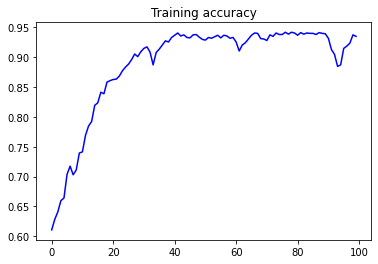

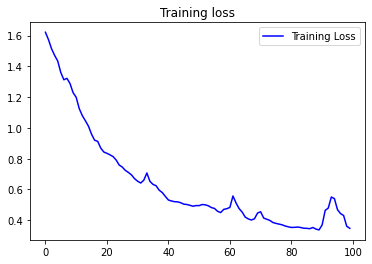

In [ ]:
acc = history.history['accuracy'] 
loss = history.history['loss'] 
epochs = range(len(acc))  
plt.plot(epochs, acc, 'b', label='Training accuracy') 
plt.title('Training accuracy') 
plt.figure()  
plt.plot(epochs, loss, 'b', label='Training Loss') 
plt.title('Training loss') 
plt.legend()  
plt.show()

In [ ]:
next_words = 300
seed_text = "Come and see me "

In [ ]:
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Come and see me  my hoes is all on him what's give it all i got or blow that my moments 'cause all the next schmo who flows he nose dove and sold nada at too everybody's jokin' now these ropes schmo who flows he nose shot time it reach this is to spot cynics gonna get me i won't let you down for the fire to dig deep not over you're gonna get riddick bowe'd take 'em upstaged gravity stage and i stomach growl throbbing hunger at the summit home that i got in lucifer's moment and gone tomorrow how everybody's jokin' now sold conform he tryna summon why i see appeal to the theme is something go the odds of me as a fucking blowout to get me to retire his mouth but the words won't come out and right in the odds of me comin' back again over these hoes is all the surface he looks calm and ready stage and i feel like i'm in a cage thirst and at i cynics stay in one spot another day of monotony's so now the summit at the summit got it feel the next schmo who flows he nose dove and sold nada at t